In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.style.use('bmh')

# custom figure styles
from plot_style import std_fig

# Classification and logistic regression

## Classification problems
__Classification problems__ are like regression problems, but the predicted values $y$ of our model $h$ now take on discrete values. This section will focus on the __binary classfication__ problem, in which $y$ takes values only in $\{0, 1\}$. 

## Logistic regression
### The logistic function

Logistic regression is horribly named, because it doesn't do regression at all; it is a method of doing classification.

In [2]:
g = lambda z: 1/(1 + np.exp(-z))

We start by defining the __logistic function__ or __sigmoid
function__.

\begin{equation}
g(z) = \frac{1}{1+e^{-z}} 
\end{equation}

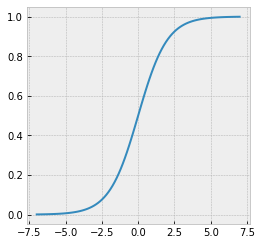

In [3]:
z = np.linspace(-7, 7, 100)
with std_fig() as (fig, ax):
    ax.plot(z, g(z))

The logistic function $g(z)$ tends to 0 as $z\to -\infty$ and tends to 1 as
$z\to +\infty$. But the important point is that $g(z)$ is always bounded between
0 and 1 (other functions that are smooth and increase from 0 to 1 could
also work, but it turns out the logistic function is a natural choice; see notes
on generalized linear models for more information). __The important point is that the logistic function can map a function defined on the reals to a probability.__


The logistic function has the useful property that 

\begin{equation}
g^\prime(z) = \frac{d }{d z} \frac{1}{1+e^{-z}} = g(z) \left(1-g(z)\right)
\end{equation}

### The logistic regression hypothesis

Our modified hypothesis $h_\theta(x)$ is 

\begin{equation}
h_\theta(x) = g\left(\theta^T x\right) = \frac{1}{1+e^{-\theta^T x}},
\end{equation}

A good way to understand logistic regression (similar to the probabilistic
interpretation of linear regression) is to endow the classification model with a
set of probabilistic properties and then fit the parameters in a maximum
likelihood sense.

### Interpretation of hypothesis output and decision boundary

Note that for data $x$ and a given $\theta$, the hypothesis $h_\theta(x)$
returns a scalar. However, the hypothesis function $h_\theta(x)$ is a continuous function of $x$, so it seems that we are no closer to our goal of a classification algorithm,
which should ultimately return a decision whether a new point should be
classified as 0 or 1.

\begin{align}
P(y=1|x;\theta) &= h_\theta(x) \\
P(y=0|x;\theta) &= 1-h_\theta(x)
\end{align}

The random variable $Y|X;\theta$ is distributed as a Bernoulli random variable.

By interpreting the outputs as a Bernoulli random variable, we have a natural
way of making the decision. We can classify a new data point $x_{new}$ as 

\begin{align}
y=1 \qquad &\text{if} \qquad h_\theta(x_{new}) \geq 0.5 \\
y=0 \qquad &\text{if} \qquad h_\theta(x_{new}) < 0.5 \\
\end{align}

Considering the behavior of the logistic function $g(z)$, we have that 

\begin{align}
g(z) \geq 0.5 \qquad &\text{if} \qquad \theta^T x_{new} \geq 0 \\
g(z) < 0.5 \qquad &\text{if} \qquad \theta^T x_{new} < 0
\end{align}

which implies that the hyperplane $\theta^T x=0$ is separating the space. We refer
to the hyperplane as the __decision boundary__. There are generalizations of this to nonlinear separating boundaries; we defer discussion of this generalization for the time being.

### Example: actuarial prediction 

As an illustrative example, suppose we have a simple actuarial model which
attempts to predict the probability of being dead in the next month given a
person's age and cholesterol. All of these numbers are cooked up.

We suppose that $\theta = [-210, 2.3, 0.5]$ has already been computed from training data. Our feature vector is $x = (x_0,\, x_1,\, x_2)$ where $x_0 =1$ is the offset (hence 1 by
convention), $x_1$ is age in years, and $x_2$ is LDL cholesterol level in mmol/L. 

In [4]:
age = np.linspace(0, 100, 50)
ldl_cholesterol = np.linspace(50, 200, 50)
AGE, LDL = np.meshgrid(age, ldl_cholesterol)
θ = [2.3, 0.5]
offset = -210

For all possible ages and cholesteral levels $x$, $\theta^T x$ can be thought of
as a plane, and the sigmoid function maps the plane (which is not bounded), to
the probability of death given the input point $(x_1,\, x_2)$.

In [5]:
plane = offset + θ[0]*AGE + θ[1]*LDL
P_death = g(plane)

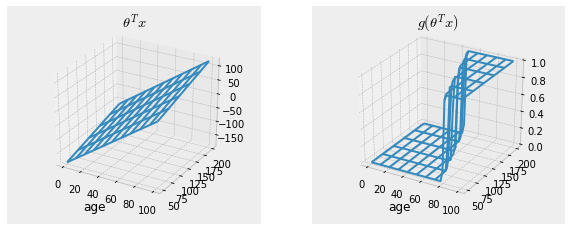

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax.plot_wireframe(AGE, LDL, plane, rstride=10, cstride=5)
ax.set_title(r'$\theta^T x$', y=0.95); ax.set_xlabel('age');
ax.dist= 12

ax = fig.add_subplot(1, 2, 2, projection='3d')
surf = ax.plot_wireframe(AGE, LDL, P_death, rstride=10, cstride=5,)
ax.set_title(r'$g(\theta^T x)$', y=0.95); ax.set_xlabel('age');
ax.dist= 12

The graphs and weights lend themselves to an intuitive interpretation. From $g\left(\theta^T
x\right)$, we see that even with very low cholesterol, probability of death
increases dramatically past age 65. We also see from $\theta$ that age has
more of an effect on probability of death than cholesterol: even with very bad
cholesterol, a 40 year old is almost certainly not going to die within the next 
month, in our model. However, a doctor might recommend that he or she strive for
lower LDL levels, since the model predicts death at 60 rather than 80 with bad
cholesterol.

### How to train the hypothesis on data

However, we can do a trick where we write the Bernoulli random variable as a continuous random variable in
an equivalent way

\begin{equation}
p(y|x;\theta) = \left(h_\theta(x)\right)^y \left(1-h_\theta(x)\right)^{1-y}
\end{equation}

In [7]:
h = lambda θ, x: 1./(1 + np.exp(-np.dot(θ, x)))

Let's take a 1D example with $\theta=1$ and $x=1$


In [8]:
θ = 1; x = 1
h(θ, x)

0.7310585786300049

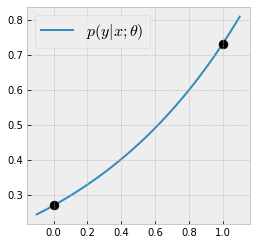

In [9]:
y = np.linspace(-0.1, 1.1, 50)
r = h(θ,x)**y * (1-h(θ, x))**(1-y)
with std_fig() as (fig, ax):
    ax.plot(y, r, zorder=0, label=r'$p(y|x;\theta)$')
    ax.scatter([0, 1], [1-h(θ,x), h(θ,x)], c='k', s=80)
    ax.legend(prop={'size': 16})

And we see that the continuous function matches the discrete PMF at the points $\{0,1\}$ so if we restrict the domain of $y$ to this set, we have agreement. We could see this also by choosing $y$ to be 0 or 1 and evaluating directly.

At first, it seems like we're taking a step backward, because we've gone from a
discrete decision back to a continuous representation, but the approach will be
similar to the probabilistic interpretation of linear regression. **We will find
an expression for the likelihood and then maximize it to find the most likely
explanation for the observations given the data.**

Since all of the training examples were generated independently, we can write
the likelihood as 

\begin{align}
L(\theta) &= p(y|X;\theta) \\
&= \prod_{i=1}^m p\left(y^{(i)}|x^{(i)};\theta\right) \\
&= \prod_{i=1}^m \left[h_\theta\left(x^{(i)}\right)\right]^{y^{(i)}} \left[1-h_\theta\left(x^{(i)}\right)\right]^{1-y^{(i)}}
\end{align}

We once again (just as in the probabilistic interpretation of of linear
regression) maximize the log likelihood

\begin{align}
\ell(\theta) &= \log
\prod_{i=1}^m \left[h_\theta\left(x^{(i)}\right)\right]^{y^{(i)}}
\left[1-h_\theta\left(x^{(i)}\right)\right]^{1-y^{(i)}} \\
&= \sum_{i=1}^{m}\left(y^{(i)} \log h_\theta\left(x^{(i)}\right) +
\left(1-y^{(i)}\right) \log\left(1-h_\theta(x^{(i)})\right)\right)
\end{align}

If we want to use a gradient ascent algorithm, we need to evaluate the update
rule

\begin{equation}
\theta_j := \theta_j + \alpha \frac{\partial }{\partial \theta_j} \ell(\theta)
\end{equation}

which follows in the direction of the gradient rather than against it since we
are trying to maximize $\ell(\theta)$. We consider the derivative for the case
of a single training example $x$ and $y$. The more general case can be written
by including the sum and adding the superscripts.

\begin{align}
\frac{\partial }{\partial \theta_j}\ell(\theta) 
&= \frac{\partial }{\partial \theta_j}
\left(y \log g(\theta^T x)  +
\left(1-y\right) \log\left(1- g(\theta^T x)\right)\right) \\
&= \left(y \frac{1}{g(\theta^T x)} 
\frac{\partial }{\partial
\theta_j}g(\theta^T x)
+ (1-y)\frac{1}{1-g(\theta^T x)}
\frac{\partial }{\partial \theta_j}\left(1-g(\theta^T x)\right)
\right) \\
&= \left(y \frac{1}{g(\theta^T x)} 
- (1-y)\frac{1}{1-g(\theta^T x)}
\right)
\frac{\partial }{\partial \theta_j}g(\theta^T x) \\
&= \left(y \frac{1}{g(\theta^T x)} - (1-y)\frac{1}{1-g(\theta^T x)} \right)
g(\theta^T x) \left(1- g(\theta^T x) \right)
\frac{\partial }{\partial \theta_j}\left(\theta^T x\right) \\
&= \left(y\left(1-g(\theta^T x)\right)  - (1-y) g(\theta^T x) \right) x_j \\
&= \left(y - h_{\theta}(x)\right)x_j
\end{align}

So the update rule in all of its glory (with the training set indices, etc) is 

\begin{equation}
\theta_j := \theta_j + \alpha\left( y^{(i)} -
h_\theta\left(x^{(i)}\right)\right),
\end{equation}

It's worth pointing out that any constants involved in the sum can be rolled
into the learning rate $\alpha$ since it's a parameter that has to be tuned
anyway.  The update rule looks the same as the least mean squares update, but
this is only cosmetic. The function $h_\theta(x)$ is now the nonlinear logistic
function.

## Locally weighted logistic regression